# Import the necessary Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation

## Get the data and pre-process it

In [ ]:
mnist.load_data

<function keras.datasets.mnist.load_data(path='mnist.npz')>

In [ ]:
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the MNIST dataset.

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).

Args:
  path: path where to cache the dataset locally
    (relative to `~/.keras/datasets`).

Returns:
  Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.

**x_train**: uint8 NumPy array of grayscale image data with shapes
  `(60000, 28, 28)`, containing the training data. Pixel values range
  from 0 to 255.

**y_train**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(60000,)` for the training data.

**x_test**: uint8 NumPy array of grayscale image data with shapes
  (10000, 28, 28), containing the test data. Pixel values range
  from 0 to 255.

**y_test**: uint8 NumPy array of digit labels (integers in range 0-9)
  with shape `(10000,)` for the test data.

Example:

```python


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Visualization of dataset

In [ ]:
def plot_input_img(i):
    plt.imshow(X_train[i] , cmap="binary")
    plt.title(y_train[i])

    plt.show()

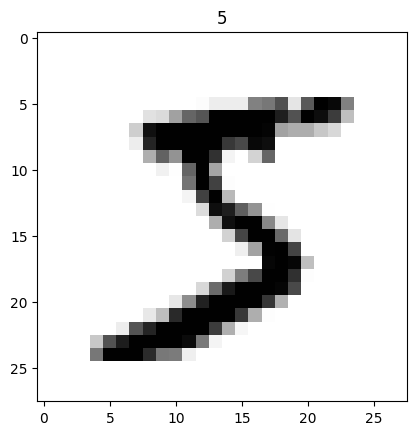

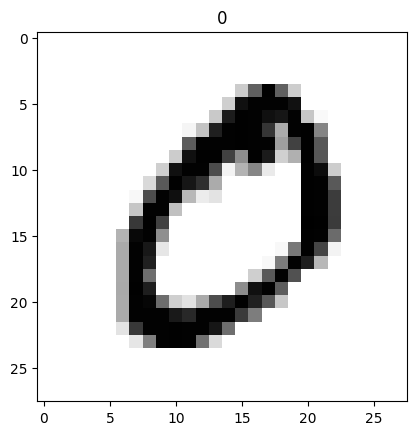

In [ ]:
for i in range(2):
    plot_input_img(i)

## Checking the value of each pixel
### Before Normalization


In [ ]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Normalizing the data| Preprocessing step

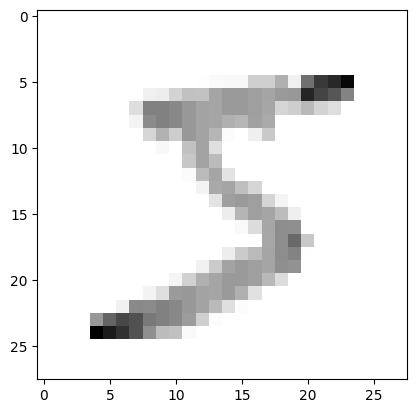

In [ ]:
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)
plt.imshow(X_train[0], cmap = plt.cm.binary ) #0

## After Noramlization

In [ ]:
print(X_train[0]) # Data

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0]) # Label

5


## Re-sizing the image
### To make it suitable for apply convolution operation

In [ ]:
import numpy as np
IMG_SIZE = 28
X_trainr = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # increasing one dimension for kernel operation
X_testr = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training Samples Dimension",X_trainr.shape)
print("Testing Samples Dimension",X_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


In [ ]:
X_train.shape

(60000, 28, 28)

## Creating a Deep Neural Network
### Training on 60,000 samples on MNIST dataset

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape =(28,28,1), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, (3,3), activation= 'relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dropout(0.25))

model.add(Dense(10,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

In [ ]:
print("Total training Samples",len(X_trainr))

Total training Samples 60000


In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam", metrics=["accuracy"])

### Training Step

In [ ]:
model.fit(X_trainr , y_train, epochs=10, validation_split= 0.3)

Epoch 1/10
1313/1313 [==============================] - 23s 17ms/step - loss: 0.2743 - accuracy: 0.9162 - val_loss: 0.1114 - val_accuracy: 0.9666
Epoch 2/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0969 - accuracy: 0.9702 - val_loss: 0.0790 - val_accuracy: 0.9768
Epoch 3/10
1313/1313 [==============================] - 19s 14ms/step - loss: 0.0729 - accuracy: 0.9778 - val_loss: 0.0666 - val_accuracy: 0.9804
Epoch 4/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0584 - accuracy: 0.9823 - val_loss: 0.0590 - val_accuracy: 0.9817
Epoch 5/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0497 - accuracy: 0.9847 - val_loss: 0.0515 - val_accuracy: 0.9844
Epoch 6/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0449 - accuracy: 0.9861 - val_loss: 0.0488 - val_accuracy: 0.9840
Epoch 7/10
1313/1313 [==============================] - 18s 14ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0469 -

In [ ]:
test_loss, test_acc = model.evaluate(X_testr , y_test)
print("Test loss on 10,000 test samples",test_loss)
print("validation Accuracy on 10,000 Samples", test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0366 - accuracy: 0.9878
Test loss on 10,000 test samples 0.03661765903234482
validation Accuracy on 10,000 Samples 0.9878000020980835


In [ ]:
predictions = model.predict([X_testr])

313/313 [==============================] - 1s 4ms/step


In [ ]:
print(predictions)

[[1.79612003e-09 6.94719260e-09 1.81803341e-06 ... 9.99995351e-01
  1.25313413e-08 2.08839978e-07]
 [3.25040048e-07 1.41401915e-05 9.99984980e-01 ... 1.41351731e-11
  1.44149027e-07 5.33033470e-12]
 [4.07153200e-10 9.99979377e-01 1.93295802e-09 ... 2.34278536e-06
  6.94373739e-07 1.07649058e-07]
 ...
 [8.28672864e-14 9.18432053e-10 1.31953736e-11 ... 7.41988657e-08
  9.19951333e-08 1.48625475e-06]
 [2.26770802e-09 1.41952544e-13 7.37028234e-12 ... 4.97693629e-13
  4.67969585e-05 6.84857726e-11]
 [2.59500098e-06 4.16259072e-09 2.28779591e-05 ... 3.80592849e-11
  1.85808203e-05 1.27062194e-07]]


In [ ]:
print(np.argmax(predictions[0]))

7


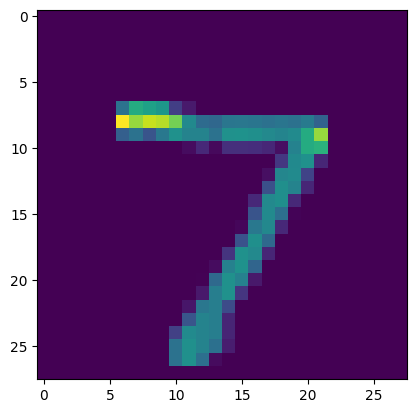

In [ ]:
plt.imshow(X_test[0])

In [ ]:
print(np.argmax(predictions[128]))

8


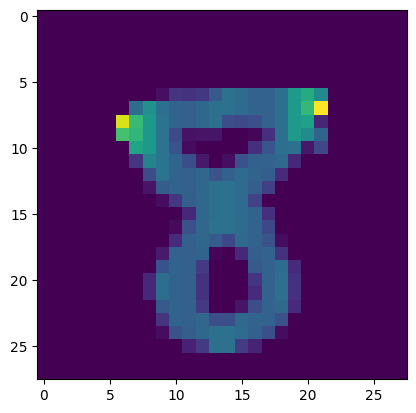

In [ ]:
plt.imshow(X_test[128])

In [ ]:
#callbacks

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models.cloning import Model

#Earlystopping
es=EarlyStopping(monitor='test_acc', min_delta = 0.01, patience= 4, verbose= 1)

#model check point

mc = ModelCheckpoint("./best.h5",monitor="test_acc", verbose=1, save_best_only = True)

cb = [es,mc]

In [ ]:
model.save('best.h5')

In [ ]:
model_S = keras.models.load_model("C://Users//ESWAR//Downloads//best.h5")

# APP

In [ ]:
import pygame, sys
from pygame.locals import *
import numpy as np
from keras.models import load_model
import cv2

WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
RED = (255, 0, 0)
WINDOWSIZEX = 640
WINDOWSIZEY = 480
BOUNDARYINC = 5
IMAGESAVE = False
MODEL = load_model("C://Users//ESWAR//Downloads//best.h5")
PREDICT = True
LABELS = {0:"zero",1:"one",2:"two",3:"three",4:"four",5:"five",6:"six",7:"seven",8:"eight",9:"nine"}

pygame.init()
FONT = pygame.font.Font("freesansbold.ttf", 18)
DISPLAYSURF = pygame.display.set_mode((WINDOWSIZEX, WINDOWSIZEY))
WHITE_INT = DISPLAYSURF.map_rgb(WHITE)
pygame.display.set_caption("Digit Recognition")
DISPLAYSURF.fill(BLACK)
iswriting = False
number_xcord = []
number_ycord = []
image_cnt = 1
while True:
	for event in pygame.event.get():
		if event.type == QUIT:
			pygame.quit()
			sys.exit()

		if event.type == MOUSEMOTION and iswriting:
			xcord, ycord = event.pos
			pygame.draw.circle(DISPLAYSURF, WHITE, (xcord, ycord), 4, 0)
			number_xcord.append(xcord)
			number_ycord.append(ycord)

		if event.type == MOUSEBUTTONDOWN:
			iswriting = True

		if event.type == MOUSEBUTTONUP:
			iswriting = False
			number_xcord = sorted(number_xcord)
			number_ycord = sorted(number_ycord)
			rect_min_x, rect_max_x = max(number_xcord[0]-BOUNDARYINC, 0), min(WINDOWSIZEX, number_xcord[-1]+BOUNDARYINC)
			rect_min_y, rect_max_y = max(0, number_ycord[0]-BOUNDARYINC), min(number_ycord[-1]+BOUNDARYINC, WINDOWSIZEY)
			number_xcord = []
			number_ycord = []
			img_arr = np.array(pygame.PixelArray(DISPLAYSURF))[rect_min_x:rect_max_x, rect_min_y:rect_max_y].T.astype(np.float32)
			if IMAGESAVE:
				cv2.imwrite("images/image-{%d}.png" % image_cnt, img_arr)
				image_cnt+=1
			if PREDICT:
				image = cv2.resize(img_arr, (28, 28))
				image = np.pad(image, (10, 10), 'constant', constant_values=0)
				image = cv2.resize(image, (28, 28))/WHITE_INT
				label = str(LABELS[np.argmax(MODEL.predict(image.reshape((1,28,28,1))))]).title()
				textSurfaceObj = FONT.render(label, True, RED, WHITE)
				textRectObj = textSurfaceObj.get_rect()
				textRectObj.left, textRectObj.bottom = rect_min_x, rect_min_y
				DISPLAYSURF.blit(textSurfaceObj, textRectObj)
			pygame.draw.rect(DISPLAYSURF, RED, (rect_min_x, rect_min_y,
			 rect_max_x - rect_min_x, rect_max_y - rect_min_y), 3)


		if event.type == KEYDOWN:
			if event.unicode == "n":
				DISPLAYSURF.fill(BLACK)
	pygame.display.update()

pygame 2.1.2 (SDL 2.0.18, Python 3.10.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
1/1 [==============================] - 0s 14ms/step


SystemExit: 

C:\Users\ESWAR\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
